$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\cset}[1]{\mathcal{#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
\newcommand{\E}[2][]{\mathbb{E}_{#1}\left[#2\right]}
\newcommand{\ip}[3]{\left<#1,#2\right>_{#3}}
\newcommand{\given}[]{\,\middle\vert\,}
\newcommand{\DKL}[2]{\cset{D}_{\text{KL}}\left(#1\,\Vert\, #2\right)}
\newcommand{\grad}[]{\nabla}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
$$

# Part 3: Summary Questions
<a id=part2></a>

This section contains summary questions about various topics from the course material.

You can add your answers in new cells below the questions.

**Notes**

- Clearly mark where your answer begins, e.g. write "**Answer:**" in the beginning of your cell.
- Provide a full explanation, even if the question doesn't explicitly state so. We will reduce points for partial explanations!
- This notebook should be runnable from start to end without any errors.

### CNNs

1. Explain the meaning of the term "receptive field" in the context of CNNs.

<b>Answer:</b>

The receptive field is the region in the input space that a particular CNN's feature is affected by. Informally, it is the part of a tensor that after convolution results in a feature. So fundamentally, it gives us an idea of where we're getting our results from as data flows through the layers of the network.

This is essential in many computer vision tasks. Take, for example, image segmentation. The network takes an input image and predicts the class label of every pixel building a semantic label map in the process. If the network can't take into account enough surrounding pixels when doing its predictions some larger objects might be left with incomplete boundaries.

It is an important concept that is very useful to have in mind when designing new models or even trying to understand already existing ones. Knowing about it allows us to further analyze the inner workings of the neural architecture we’re interested in and think about eventual improvements.

2. Explain and elaborate about three different ways to control the rate at which the receptive field grows from layer to layer. Compare them to each other in terms of how they combine input features.

<b>Answer:</b>

The three different ways to control the rate at which the receptive field grows can be summarized as follows:
* Add more convolutional layers (make the network deeper).
* Add pooling layers or higher stride convolutions (sub-sampling).
* Use dilated convolutions.

<i><u>Option 1</u></i> increases the receptive field size <b>linearly</b>, as each extra layer increases the receptive field size by the kernel size. Moreover, it is experimentally validated that as the theoretical receptive field is increasing, however, the effective (experimental) receptive field is reducing. 

<i><u>Option 2</u></i>, sub-sampling techniques like <u>pooling</u>, increase the receptive field size <b>multiplicatively</b> and in the absence of striding, neighboring nodes in a CNN are influenced by nearly the same set of inputs (i.e., their receptive fields are nearly identical). It is a way to reduce the dimension of the feature map by combining features in the same region. An additional sub-sampling that can be used is the <u>stride</u>, which determines the shift size of the filter, and how large is the overlapping portion of the receptive fields between features.Therefore, the consecutive convolutional layers are affected by increasingly major parts of the input image, which results in a rapid increase in the receptive field size.

<i><u>Option 3</u></i>, In essence, dilated convolutions introduce another parameter, denoted as $r$, called the dilation rate. Dilations introduce "holes" in a convolutional kernel. The "holes" basically define a spacing between the values of the kernel. So, while the number of weights in the kernel is unchanged, the weights are no longer applied to spatially adjacent samples. Dilating a kernel by a factor of $r$ introduces a kind of striding of $r$.

3. Imagine a CNN with three convolutional layers, defined as follows:

In [2]:
import torch
import torch.nn as nn

cnn = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(in_channels=4, out_channels=16, kernel_size=5, stride=2, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=7, dilation=2, padding=3),
    nn.ReLU(),
)

cnn(torch.rand(size=(1, 3, 1024, 1024), dtype=torch.float32)).shape

torch.Size([1, 32, 122, 122])

What is the size (spatial extent) of the receptive field of each "pixel" in the output tensor?

<b>Answer:</b>

Each layer $l$, its spatial configuration is parameterized by these variables below:
* <i>k</i>: kernel size (positive integer)
* <i>s</i>: stride (positive integer)
* <i>p</i>: padding (non-negative integer)
* <i>d</i>: dilation (positive integer) 

The <i><b>Relu Activation</b></i> does not affect the receptive field at all. \
The <i><b>MaxPooling2d(2)</b></i> can be considered as <i>Conv2d</i> with:
* kernel size = 2
* stride = 2
* padding = 0
* dilation = 1

Define $r$ as the receptive field size of the final output feature map:

$r_i = r_{i-1} + d_i(k_i - 1) *  \prod_{j=1}^{k-1} s_j$

Therefore,

$Input$ \
$r_0 = 1$ 

$Conv_{k=3, d=1, s=1}$ \
$r_1 = 1 + 1(3 - 1) = 3$ 

$Max Pooling_{k=2, d=1, s=2}$ \
$r_2 = 3 + 1(2 - 1) * 1 = 4$

$Conv_{k=5, d=1, s=2}$ \
$r_3 = 4 + 1(5 - 1) * 1 * 2 = 12$

$Max Pooling_{k=2, d=1, s=2}$ \
$r_4 = 12 + 1(2 - 1) * 1 * 2 * 2 = 16$

$Conv_{k=7, d=2, s=1}$ \
$r_5 = 16 + 2(7 - 1) * 1 * 2 * 2 * 2 = 112$

4. You have trained a CNN, where each layer $l$ is represented by the mapping $\vec{y}_l=f_l(\vec{x};\vec{\theta}_l)$, and $f_l(\cdot;\vec{\theta}_l)$ is a convolutional layer (not including the activation function).

  After hearing that residual networks can be made much deeper, you decide to change each layer in your network you used the following residual mapping instead $\vec{y}_l=f_l(\vec{x};\vec{\theta}_l)+\vec{x}$, and re-train.

  However, to your surprise, by visualizing the learned filters $\vec{\theta}_l$ you observe that the original network and the residual network produce completely different filters. Explain the reason for this.

<b>Answer:</b>

Let $g(x)$ be the original function $\vec{y}_l=f_l(\vec{x};\vec{\theta}_l)$ learned by the layers. \
Let’s consider $h(x)$ be the residual mapping function $\vec{y}_l=f_l(\vec{x};\vec{\theta}_l)+\vec{x}$, layers with skip connections (the $+\vec{x}$ term denotes the skip connection).

In the residual mapping function, the $+\vec{x}$ term will bring the original value, layer $g(x)$ has to learn just the changes in the value, or the residue or <b>delta</b> $x$. 
Whatever is being learned in $g(x)$ is just the residue, either positive or negative to modify $x$ to the required value, and as a result, the residual network produces completely different filters.

For $h(x)$ to be an identity function, the residue $g(x)$ just has to become a zero function, which is very easy to learn, i.e. set all weights to zero. Then $h(x) = 0 + x = x$, which is the required identity function. This will help overcome the degradation problem.

### Dropout

1. Consider the following neural network:

In [3]:
import torch.nn as nn

p1, p2 = 0.1, 0.2
nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Dropout(p=p1),
    nn.Dropout(p=p2),
)

Sequential(
  (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Dropout(p=0.2, inplace=False)
)

If we want to replace the two consecutive dropout layers with a single one defined as follows:
```python
nn.Dropout(p=q)
```
what would the value of `q` need to be? Write an expression for `q` in terms of `p1` and `p2`.

<b>Answer:</b>

Dropout works by probabilistically removing, or "dropping out" inputs to a layer, which may be input variables in the data sample or activations from a previous layer. Dropping out the elements with probability $p$ will result in keeping the elements with the probability of $1 - p$.

Therefore, to replace the two consecutive dropout layers with a single probability, we will keep the elements with the probability of $1 - q$ which is the probability of $1 - p_1$ multiplied by the probability of $1 - p_2$.

$1 - q = (1 - p_1) * (1 - p_2)$ \
$1 - q = 1 - p_2 - p_1 + p_1p_2$ \
$q = p_1 + p_2 - p_1p_2$ \
$q = p_1 + p_2(1 - p_1)$

2. **True or false**: dropout must be placed only after the activation function.

<b>Answer:</b>

False.
Commonly, dropout is applied after the non-linear activation function. However, when using rectified linear units (ReLUs), it might make sense to apply the dropout before the non-linear activation for reasons of computational efficiency depending on the particular code implementation. Therefore, dropout doesn't necessarily be placed only after the activation function.

For example, let's consider the two networks as below:
* Network 1: Fully connected, linear activation -> ReLU -> Dropout -> ...
* Network 2: Fully connected, linear activation -> Dropout -> ReLU -> ...

We will use these outputs of the linear activation of the fully connected layer: $[-1, -2, -3, 4, 5, 6]$

Now, applying dropout with a probability of 50%, let’s assume that the units being deactivated are <b>units 2, 4, and 6</b>:
* Network 1: $[0, 0, 0, 4, 5, 6] -> [0*2, 0, 0*2, 0, 0*2, 0] = [0, 0, 0, 0, 10, 0]$
* Network 2: $[-1, -2, -3, 4, 5, 6] -> [-1*2, 0, -3*2, 0, 5*2, 0] = [0, 0, 0, 0, 10, 0]$

As a result, we can observe the same output from both networks.

3. After applying dropout with a drop-probability of $p$, the activations are scaled by $1/(1-p)$. Prove that this scaling is required in order to maintain the value of each activation unchanged in expectation.

<b>Answer:</b>

The activations are scaled by $1/(1-p)$ because the expected value of a Dropout network is equivalent to a regular network with its weights scaled with the Dropout rate $p$. The scaling makes the inferences from a Dropout network comparable to the full network (there are computational benefits as well).

<b><i>Proof:</i></b>

Let's consider $\hat{x}$ to be the result of the applied activation function on $x$.

$\hat{x} = w \cdot (1 - p)$, otherwise it will be zero (according to the activation function).

$\mathbb{E}[\mathbf{\hat x}] = \frac{1}{n} \sum_{i=1}^{n}{\hat x_i} = \frac{1}{n} \sum_{i=1}^{n}{(1-p)x_i} = (1-p) \mathbb{E}[\mathbf{x}]$ 

Therefore, this $(1-p)$ scaling is required in order to maintain the value of each activation unchanged in expectation.

### Losses and Activation functions

1. You're training a an image classifier that, given an image, needs to classify it as either a dog (output 0) or a hotdog (output 1). Would you train this model with an L2 loss? if so, why? if not, demonstrate with a numerical example. What would you use instead?

<b>Answer:</b>

No, we would not train this model with the L2 loss function, instead, a more suitable loss function will be the cross-entropy loss or the logistic loss.

There are two reasons why the L2 loss function (i.e. MSE) is an incorrect choice for binary classification problems: 
* Using the L2 loss function means that we assume that the underlying data has been generated from a normal distribution (a bell-shaped curve). In Bayesian terms this means we assume a Gaussian prior. While in reality, a dataset that can be classified into two categories (i.e binary) is not from a normal distribution but a Bernoulli distribution.
* The L2 loss function is non-convex for binary classification. In simple terms, if a binary classification model is trained with the MSE Cost function, it is not guaranteed to minimize the Cost function. This is because the function expects real-valued inputs in range $(-\infty, \infty)$, while binary classification models output probabilities in range $(0,1)$ through the sigmoid/logistic function.

When the MSE function is passed a value that is unbounded a nice U-shaped (convex) curve is the result where there is a clear minimum point at the target value (y). On the other hand, when a bounded value from a Sigmoid function is passed to the MSE function the result is not convex (on one side the function is concave while on the other side the function is convex and has no clear minimum point). 

Therefore, if by accident a binary classification neural network is initialized with weights that are large in magnitude such that it lands on the concave part of the MSE Cost function gradient descent will not work and consequently, weights may not update or improve very slowly. This is one of the reasons why neural networks should be carefully initialized with small values when training.

To demonstrate this conclusion, if our classifier's output for a hotdog will be 0.65, it means that the model predicted 65% hotdog, hence:

The result of the L2 loss function: \
Predicted output = 0.65 \
Actual output = 1

$= (1−0.65)^2 = 0.1225$

The result of the cross-entropy loss function: \
Predicted output = 0.65 \
Actual output = 1

$= −log(0.65)=0.9118$

Which indicates a higher probability that this is a hotdog.

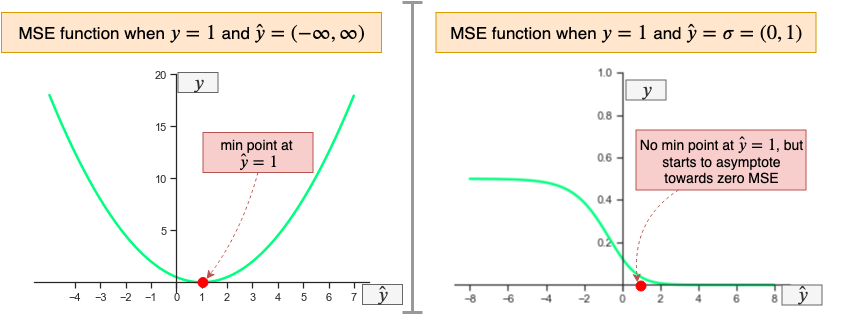

In [6]:
from IPython import display
display.Image("./imgs/l2-vs-cross.png")

<i>In the above image we can present the non-convex for binary classification of the L2 loss function versus the binary classification models output probabilities.</i>

2. After months of research into the origins of climate change, you observe the following result:

<center><img src="https://sparrowism.soc.srcf.net/home/piratesarecool4.gif" /></center>

You decide to train a cutting-edge deep neural network regression model, that will predict the global temperature based on the population of pirates in `N` locations around the globe.
You define your model as follows:

In [3]:
import torch.nn as nn

N = 42  # number of known global pirate hot spots
H = 128
mlpirate = nn.Sequential(
    nn.Linear(in_features=N, out_features=H),
    nn.Sigmoid(),
    *[
        nn.Linear(in_features=H, out_features=H), nn.Sigmoid(),
    ]*24,
    nn.Linear(in_features=H, out_features=1),
)

While training your model you notice that the loss reaches a plateau after only a few iterations.
It seems that your model is no longer training.
What is the most likely cause?

<b>Answer:</b>

Due to the depth of the network, which contains many layers (very deep network), and using only the sigmoid activation function (which outputs results in the range of [0,1]), it can cause losing massive information during the training phase. The network reduces many details into a small range.

Therefore, it's most likely that this model is suffering from a vanishing gradient, which causes the saturation in the sigmoid function, hence, is seen as a plateau.

3. Referring to question 2 above: A friend suggests that if you replace the `sigmoid` activations with `tanh`, it will solve your problem. Is he correct? Explain why or why not.

Replacing the sigmoid activations with the tanh function apparently will not improve this model. 

As the same as in the sigmoid, the tanh suffers from vanishing gradients as well, since they are very similar, the difference is in their range. \
The tanh's range is [−1,1.] and the sigmoid's range is [0,1]. Thus, it is most likely that the tanh will reach a plateau as well.

4. Regarding the ReLU activation, state whether the following sentences are **true or false** and explain: \
    a. In a model using exclusively ReLU activations, there can be no vanishing gradients. \
    b. The gradient of ReLU is linear with its input when the input is positive.        
    c. ReLU can cause "dead" neurons, i.e. activations that remain at a constant value of zero.

<b>Answer:</b>

a. <b>False.</b> Vanishing gradients are common when the Sigmoid or Tanh activation functions are used in the hidden layer units. When the inputs grow extremely small or extremely large, the sigmoid function saturates at 0 and 1 while the tanh function saturates at -1 and 1. However, ReLU is sometimes used as an activation function to address the vanishing gradient problems, but it can cause the exploding gradients problem (due to getting extremely negative values).

b. <b>False.</b> The ReLU activation function is defined as $f(x) = max(0, x)$, which means that the gradient of the ReLU function is 1, hence, the gradient is not linear corresponding to the input.

c. <b>True.</b> ReLU can cause "dead" neurons". It is mainly caused by a large negative gradient that flows through the network resulting in a big negative weight for ReLU neurons.

### Optimization

1. Explain the difference between: stochastic gradient descent (SGD), mini-batch SGD and regular gradient descent (GD).

<b>Answer:</b>

<b>Gradient Descent:</b> Gradient Descent involves calculations over the full training set at each step as a result of which it is very slow on very large training data. Thus, it becomes very computationally expensive to perform GD. However, this is great for convex or relatively smooth error manifolds. Also, GD scales well with the number of features.

<b>Stochastic Gradient Descent:</b> SGD tries to solve the main problem in Gradient descent which is the usage of whole training data to calculate gradients as each step. SGD is stochastic i.e it picks up a "random" instance of training data at each step and then computes the gradient making it much faster as there are much fewer data to manipulate at a single time, unlike GD.

<b>Mini-batch Stochastic Gradient Descent:</b> mini-batch SGD is a mixture of both Gradient Descent and SGD. Neither do we use the whole dataset all at once nor do we use the single example at a time. We use a batch of a fixed number of training examples that is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants.

2. Regarding SGD and GD: \
    a. Provide at least two reasons for why SGD is used more often in practice compared to GD. \
    b. In what cases can GD not be used at all?

<b>Answer:</b>

a. In both gradient descent (GD) and stochastic gradient descent (SGD), you iteratively update a set of parameters to minimize an error function.

While in GD, you have to run through <b>all</b> the samples in your training set to do a single update for a parameter in a particular iteration, in SGD, on the other hand, you use <b>only one</b> training sample from your training set to do the update for a parameter in a particular iteration.

Thus, if the number of training samples is large, in fact very large, then using gradient descent may take too long because in every iteration when you are updating the values of the parameters, you are running through the complete training set. On the other hand, using SGD will be faster because you use only one training sample and it starts improving itself right away from the first sample.

SGD often converges much faster compared to GD but the error function is not as well minimized as in the case of GD. \
Often in most cases, the close approximation that you get in SGD for the parameter values is enough because they reach the optimal values and keep oscillating there.

b. The cases we prefer to avoid using GD:
* It is not suggested for huge training samples (since it is a slow and computationally expensive algorithm and the convergence is slow).
* When the loss surface has lots of local minima, thus the GD cannot escape shallow local minima easily.

3. You have trained a deep resnet to obtain SoTA results on ImageNet.
While training using mini-batch SGD with a batch size of $B$, you noticed that your model converged to a loss value of $l_0$ within $n$ iterations (batches across all epochs) on average.
Thanks to your amazing results, you secure funding for a new high-powered server with GPUs containing twice the amount of RAM.
You're now considering to increase the mini-batch size from $B$ to $2B$.
Would you expect the number of iterations required to converge to $l_0$ to decrease or increase when using the new batch size? explain in detail.

<b>Answer:</b>

We would expect fewer iterations to converge.

Since we would be using more additional samples, the direction of the gradient would be more accurate and less stochastic. Therefore, we need fewer steps to converge due to the optimizer's better direction movements.

However, we do obtain fewer steps to converge, but it will not necessarily take us less time, because at each iteration we have to use more samples to calculate the loss. Thus, since the GPUs contain twice the number of RAM uses, we can use vectorization with a larger batch in each iteration so the Time <b>might</b> take to get to that loss value will decrease.

Moreover, increasing the batch size could lead to faster convergence.

4. For each of the following statements, state whether they're **true or false** and explain why. \
    a. When training a neural network with SGD, every epoch we perform an optimization step for each sample in our dataset. \
    b. Gradients obtained with SGD have less variance and lead to quicker convergence compared to GD. \
    c. SGD is less likely to get stuck in local minima, compared to GD. \
    d. Training  with SGD requires more memory than with GD. \
    e. Assuming appropriate learning rates, SGD is guaranteed to converge to a local minimum, while GD is guaranteed to converge to the global minimum. \
    f. Given a loss surface with a narrow ravine (high curvature in one direction): SGD with momentum will converge more quickly than Newton's method which doesn't have momentum.

<b>Answer:</b>

a. <b>False.</b> In SGD we use only one training sample from the training set to do the update for a parameter in a particular iteration. \
b. <b>False.</b> SGD computes the gradients based on a single sample from the training set, hence the learning diagram can be extremely noisy and slower than the GD. However, in practice, the time it takes to compute a single sample gradient (instead of the whole dataset) is faster, thus the SGD's convergence is faster than the GD (when training on large datasets). \
c. <b>True.</b> In GD, the value of the cost function decreases gradually, which increases the chance of meeting local minima and makes it impossible to get out of that point. Whereas in SGD, the variation is abrupt. Thus it reduces the probability of getting stuck at local minima, and even if it gets stuck, chances are that it will definitely come out due to its jolting movement. \
d. <b>False.</b> SGD uses only one or a subset of the training samples, compared to the GD that uses the whole dataset. It means that the whole dataset doesn't need to be stored in the memory, hence SGD doesn't require more memory than the GD. \
e. <b>False.</b> both GD and SGD are not guaranteed to converge to a global minimum. It mostly relies on the convexity of the loss surface. \
f. <b>False.</b> Gradient descent maximizes a function using knowledge of its derivative. Newton's method, a root-finding algorithm, maximizes a function using knowledge of its second derivative. That can be faster when the second derivative is known and easy to compute such as narrow ravine (the Newton-Raphson algorithm is used in logistic regression), therefore, Newton's method will converge faster than the SGD with momentum. However, in other cases, the analytic expression for the second derivative is often complicated or intractable, requiring a lot of computation. Numerical methods for computing the second derivative also require a lot of computation (if $n$ values are required to compute the first derivative, $n^2$ values are required for the second derivative).

5. **Bonus** (we didn't discuss this at class):  We can use bi-level optimization in the context of deep learning, by embedding an optimization problem as a layer in the network.
  **True or false**: In order to train such a network, the inner optimization problem must be solved with a descent based method (such as SGD, LBFGS, etc).
  Provide a mathematical justification for your answer.

<b>Answer:</b>

<b>False.</b> It doesn't rely on the inner optimization problem. 
Therefore we can minimize the loss without using a descent-based method.

6. You have trained a neural network, where each layer $l$ is represented by the mapping $\vec{y}_l=f_l(\vec{x};\vec{\theta}_l)$ for some arbitrary parametrized functions $f_l(\cdot;\vec{\theta}_l)$. \
   Unfortunately while trying to break the record for the world's deepest network, you discover that you are unable to train your network with more than $L$ layers. \
    a. Explain the concepts of "vanishing gradients", and "exploding gradients". \
    b. How can each of these problems be caused by increased depth? \
    c. Provide a numerical example demonstrating each. \
    d. Assuming your problem is either of these, how can you tell which of them it is without looking at the gradient tensor(s)?

<b>Answer:</b>

a. The term <b>vanishing gradient</b> refers to the fact that in a feedforward network (FFN) the backpropagated error signal typically decreases (or increases) exponentially as a function of the distance from the final layer. <b>Exploding gradients</b> are a problem where large error gradients accumulate and result in very large updates to neural network model weights during training. This has the effect of your model is unstable and unable to learn from your training data.

b. This problem happens because of weights, not because of the activation function. Due to high weight values, the derivatives will also be higher so that the new weight varies a lot to the older weight, and the gradient will never converge. So it may result in oscillating around minima and never come to a global minima point.

c. <b>Vanishing Gradient:</b> For instance, if the tanh has a gradient in the range (0,1), thus for a network with n layers, the backpropagation computes gradients by the chain rule such that the accumulation will have the effect of multiplying those smallish gradients n times. It will decrease those gradients exponentially and might affect vanishing gradients for the earlier layers. \
<b>Exploding Gradient:</b> For instance, if we have a network with n layers with initial weights that are larger than 1. Therefore, according to the backpropagation, those weights can get exponentially larger which might cause an exploding gradient.

d. By following the graph of the loss function. In case of the loss increase, we can assume that we have an exploding gradient, and in case the loss value remains static/decreases very slowly, we can assume that we have a vanishing gradient.

### Backpropagation

1. You wish to train the following 2-layer MLP for a binary classification task:
  $$
  \hat{y}^{(i)} =\mat{W}_2~ \varphi(\mat{W}_1 \vec{x}^{(i)}+ \vec{b}_1) + \vec{b}_2
  $$
  Your wish to minimize the in-sample loss function is defined as
  $$
  L_{\mathcal{S}} = \frac{1}{N}\sum_{i=1}^{N}\ell(y^{(i)},\hat{y}^{(i)}) + \frac{\lambda}{2}\left(\norm{\mat{W}_1}_F^2 + \norm{\mat{W}_2}_F^2 \right)
  $$
  Where the pointwise loss is binary cross-entropy:
  $$
  \ell(y, \hat{y}) =  - y \log(\hat{y}) - (1-y) \log(1-\hat{y})
  $$
  
  Write an analytic expression for the derivative of the final loss $L_{\mathcal{S}}$ w.r.t. each of the following tensors: $\mat{W}_1$, $\mat{W}_2$, $\mat{b}_1$, $\mat{b}_2$, $\mat{x}$.

<b>Answer:</b>

$ {{\partial \ell} \over {\partial \hat{y}}} = {{-y} \over \hat{y}} + {{1-y} \over {1 -\hat{y}}} = {{\hat{y} - \mat{y}} \over {\hat{y}(1- \hat{y})}} $

$
{{\partial L_s} \over {\partial \mat{W}_1}} = 
{{\partial \ell} \over {\partial \hat{y}}} * 
{{\partial \hat{y}} \over {\partial \mat{W}_1 x+ b_1}} *
{{\partial \mat{W}_1 x+ b_1} \over {\partial \mat{W}_1}} +
\lambda  \norm{\mat{W}_1}_F = 
{1 \over N }\sum_{i=1}^N{{\hat{y} - \mat{y}} \over {\hat{y}(1- \hat{y})}} \cdot
\mat{W}_2^T \cdot \varphi ' (\mat{W}_1 x+ b_1) \cdot \mat{x}^T + \lambda  \norm{\mat{W}_1} _F
$

$
{{\partial L_s} \over {\partial \mat{W}_2}} = 
{{\partial \ell} \over {\partial \hat{y}}} * 
{{\partial \hat{y}} \over {\partial \mat{W}_2}} +
\lambda  \norm{\mat{W}_2}_F = 
{1 \over N }\sum_{i=1}^N{{\hat{y} - \mat{y}} \over {\hat{y}(1- \hat{y})}} \cdot
\varphi(\mat{W}_1 x+ b_1)^T + \lambda  \norm{\mat{W}_2}_F
$

$
{{\partial L_s} \over {\partial b_1}} = 
{{\partial \ell} \over {\partial \hat{y}}} * 
{{\partial \hat{y}} \over {\partial \mat{W}_1 x+ b_1}} *
{{\partial \mat{W}_1 x+ b_1} \over {\partial b_1}} =
{1 \over N }\sum_{i=1}^N{{\hat{y} - \mat{y}} \over {\hat{y}(1- \hat{y})}} \cdot
\mat{W}_2^T \cdot \varphi '(\mat{W}_1 x+ b_1)
$

$
{{\partial L_s} \over {\partial b_2}} =
{{\partial \ell} \over {\partial \hat{y}}} * 
{{\partial \hat{y}} \over {\partial b_2}} = 
{1 \over N }\sum_{i=1}^N{{\hat{y} - \mat{y}} \over {\hat{y}(1- \hat{y})}}
$

$
{{\partial L_s} \over {\partial \mat{x}}} =
{{\partial \ell} \over {\partial \hat{y}}} * 
{{\partial \hat{y}} \over {\partial \mat{W}_1 x+ b_1}} *
{{\partial \mat{W}_1 x+ b_1} \over {\partial \mat{x}}} = 
{1 \over N }\sum_{i=1}^N{{\hat{y} - \mat{y}} \over {\hat{y}(1- \hat{y})}} \cdot
\mat{W}_2^T \cdot \varphi ' (\mat{W}_1 x+ b_1) \cdot \mat{W}_1^T
$

2. The derivative of a function $f(\vec{x})$ at a point $\vec{x}_0$ is
  $$
  f'(\vec{x}_0)=\lim_{\Delta\vec{x}\to 0} \frac{f(\vec{x}_0+\Delta\vec{x})-f(\vec{x}_0)}{\Delta\vec{x}}
  $$
  
    a. Explain how this formula can be used in order to compute gradients of neural network parameters numerically, without automatic differentiation (AD). \
    b. What are the drawbacks of this approach? List at least two drawbacks compared to AD.

<b>Answer:</b>

a. We can determine a sufficiently small $\Delta\vec{x}$, and use it in the specified formula during the update of our weights in the backpropagation phase. \
Therefore, without using the limit operation, we can obtain an approximation of the derivative at a specific point.

b. The drawbacks of this approach:
* Numerical: When using the derivative formula, it would grant us an approximation of the result, compared to AD that will provide us the accurate result.
* Computational Complexity: Using this method to approximate the derivative can take a longer time since we would need to compute all the parameters at every optimization iteration.

3. Given the following code snippet: \
    a. Write a short snippet that implements that calculates gradient of `loss` w.r.t. `W` and `b` using the approach of numerical gradients from the previous question. \
    b. Calculate the same derivatives with autograd. \
    c. Show, by calling `torch.allclose()` that your numerical gradient is close to autograd's gradient.

In [31]:
import torch

N, d = 100, 5
dtype = torch.float64
X = torch.rand(N, d, dtype=dtype)
W, b = torch.rand(d, d, requires_grad=True, dtype=dtype), torch.rand(d, requires_grad=True, dtype=dtype)

def foo(W, b):
    return torch.mean(X @ W + b)

loss = foo(W, b)
print(f"{loss=}")

# TODO: Calculate gradients numerically for W and b
grad_W = torch.zeros(W.shape, dtype=dtype)
grad_b = torch.zeros(b.shape, dtype=dtype)
delta_X = 1e-7

for i in range(d):
    for j in range(d):
        delta_W = torch.clone(W)
        delta_W[i,j] = W[i,j] + delta_X
        grad_W[i,j] = (foo(delta_W, b) - foo(W, b)) / delta_X

for i in range(d):
    delta_b = torch.clone(b)
    delta_b[i] = b[i] + delta_X
    grad_b[i] = (foo(W, delta_b) - foo(W, b)) / delta_X

# TODO: Compare with autograd using torch.allclose()
loss.backward()
autograd_W = W.grad
autograd_b = b.grad

assert torch.allclose(grad_W, autograd_W)
assert torch.allclose(grad_b, autograd_b)

loss=tensor(1.8774, dtype=torch.float64, grad_fn=<MeanBackward0>)


### Sequence models

1. Regarding word embeddings: \
    a. Explain this term and why it's used in the context of a language model. \
    b. Can a language model like the sentiment analysis example from the tutorials be trained without an embedding (i.e. trained directly on sequences of tokens)? If yes, what would be the consequence for the trained model? if no, why not?

<b>Answer:</b>

a. Word embedding is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning. It is being used in natural language processing (NLP), such that words that are close in meaning are grouped near to one another in vector space.

b. The language model, like the sentiment analysis, can be trained without an embedding, using the one-hot encoding for the tokens, however, it will not perform very well. \
The one-hot encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality.

2. Considering the following snippet, explain: \
    a. What does `Y` contain? why this output shape? \
    b. **Bonus**: How you would implement `nn.Embedding` yourself using only torch tensors. 

In [5]:
import torch.nn as nn

X = torch.randint(low=0, high=42, size=(5, 6, 7, 8))
embedding = nn.Embedding(num_embeddings=42, embedding_dim=42000)
Y = embedding(X)
print(f"{Y.shape=}")

Y.shape=torch.Size([5, 6, 7, 8, 42000])


<b>Answer:</b>

a. The Embedding holds a Tensor of dimension (vocab_size, vector_size), i.e. of the size of the vocabulary x the dimension of each vector embedding, and a method that does the lookup. Therefore, it means that Y is a tensor that contains the mapping between words with the shape of (5,6,7,8) to 42 embedding of size 42,000 that represents each of those words

b. Perhaps we can construct a one-hot encoding representation from each token. Then, for each token, we can implement our lookup mapping from the tokens' size dimensional space into an "embedding_dim" dimensional space.

3. Regarding truncated backpropagation through time (TBPTT) with a sequence length of S: State whether the following sentences are **true or false**, and explain. \
    a. TBPTT uses a modified version of the backpropagation algorithm. \
    b. To implement TBPTT we only need to limit the length of the sequence provided to the model to length S. \
    c. TBPTT allows the model to learn relations between input that are at most S timesteps apart.

<b>Answer:</b>

a. <b>True.</b> Truncated Backpropagation Through Time or TBPTT, is a modified version of the BPTT training algorithm for recurrent neural networks where the sequence is processed one timestep at a time, and periodically (k1 timesteps) the BPTT update is performed back for a fixed number of timesteps (k2 timesteps). The Backpropagation Through Time, or BPTT, is the training algorithm used to update weights in recurrent neural networks like LSTMs. \
b. <b>False.</b> A modification of BPTT (TBPTT) is to limit the number of timesteps used on the backward pass and estimate the gradient used to update the weights rather than calculate it fully. \
c. <b>False.</b> Despite the fact that the gradients' computations stop after S steps (timestamps), they still might hold some information in the states during the training phase, which can learn more than the S timestamps apart.

### Attention

1. In tutorial 5 we learned how to use attention to perform alignment between a source and target sequence in machine translation. \
    a. Explain qualitatively what the addition of the attention mechanism between the encoder and decoder does to the hidden states that the encoder and decoder each learn to generate (for their language). How are these hidden states different from the model without attention? \
    b. After learning that self-attention is gaining popularity thanks to the transformer models, you decide to change the model from the tutorial: instead of the queries being equal to the decoder hidden states, you use self-attention, so that the keys, queries and values are all equal to the encoder's hidden states (with learned projections, like in the tutorial..). What influence do you expect this will have on the learned hidden states?


<b>Answer:</b>

a. The attention mechanism was introduced to improve the performance of the encoder-decoder model for machine translation. \
The idea behind the attention mechanism was to permit the decoder to utilize the most relevant parts of the input sequence in a flexible manner, by a weighted combination of all of the encoded input vectors, with the most relevant vectors being attributed the highest weights. \
The encoder hidden states are used as a query to the attention, which means it acts as feedback to the model itself. All hidden states, including the encoder and the decoder, are used to generate the context vector.

b. The attention mechanism allows the output to focus attention on input whereas producing output, while the <b>self-attention</b> model allows inputs to interact with each other (their neighbors, and self-attention could be restricted to considering only a neighborhood of size $r$). Therefore, we expect that the influence on the learned hidden states will drive the decoder to produce/generate output words with respect to the nearest words in the sentence.

### Unsupervised learning

1. As we have seen, a variational autoencoder's loss is comprised of a reconstruction term and  a KL-divergence term. While training your VAE, you accidentally forgot to include the KL-divergence term.

    What would be the qualitative effect of this on: \
    a. Images reconstructed by the model during training ($x\to z \to x'$)? \
    b. Images generated by the model ($z \to x'$)?

<b>Answer:</b>

VAEs encode their inputs as normal (Gaussian) distributions rather than points. This is where the KL divergence comes in. It is optimal for the distributions of the VAE to be regularized to increase the amount of overlap within the latent space. KL divergence measures this and is added into the loss function.

a. We would expect that the images reconstructed by the model during training will be very similar to the original images since their loss values will focus on the reconstruction term. Hence, the model will be overfitted to the training dataset.

b. We would expect that the images generated by the model will have poor results since the prediction of the model is simply generating images based on the Normal distribution $\mathcal{N}(\vec{0},\vec{I})$ and not from encoded images. 

2. Regarding VAEs, state whether each of the following statements is **true or false**, and explain: \
    a. The latent-space distribution generated by the model for a specific input image is $\mathcal{N}(\vec{0},\vec{I})$. \
    b. If we feed the same image to the encoder multiple times, then decode each result, we'll get the same reconstruction. \
    c. Since the real VAE loss term is intractable, what we actually minimize instead is it's upper bound, in the hope that the bound is tight.

<b>Answer:</b>

a. <b>False.</b> The latent-space distribution generated by the model for a specific input image can be distinguishable since we are using the KL divergence, it can approximate it to the Normal distribution (using the reparameterization trick). \
b. <b>False.</b> feeding the same image to the encoder multiple times, then decoding each result will not necessarily produce the same reconstruction because the produced images are being sampled from a probability distribution, hence it is not deterministic. \
c. <b>True.</b> The real VAE loss term is intractable, thus we do minimize its upper bound, and hope that the bound is tight appropriately that the model will produce good results. We perform this action due to the lack of the actual posterior and its distance.

2. Regarding GANs, state whether each of the following statements is **true or false**, and explain: \
    a. Ideally, we want the generator's loss to be low, and the discriminator's loss to be high so that it's fooled well by the generator. \
    b. It's crucial to backpropagate into the generator when training the discriminator. \
    c. To generate a new image, we can sample a latent-space vector from $\mathcal{N}(\vec{0},\vec{I})$. \
    d. It can be beneficial for training the generator if the discriminator is trained for a few epochs first, so that it's output isn't arbitrary. \
    e. If the generator is generating plausible images and the discriminator reaches a stable state where it has 50% accuracy (for both image types), training the generator more will further improve the generated images.

<b>Answer:</b>

a. <b>False.</b> Ideally, the generator seeks to minimize the log of the inverse probability predicted by the discriminator for fake images. This has the effect of encouraging the generator to generate samples that have a low probability of being fake.
Additionally, The discriminator seeks to maximize the probability assigned to real and fake images (described mathematically, the discriminator seeks to maximize the average of the log probability for real images and the log of the inverted probabilities of fake images).
However, we do not want the generator's loss values will be extremely low in order for the model to generate good images, and we do not want that the discriminator's loss values will be extremely high, otherwise, he will not differentiate between fake and real images. \
b. <b>False.</b> It is not crucial to backpropagate into the generator when training the discriminator. Unlike the generator, training the discriminator does not require performing the backpropagation step through its training since it is trained as a formal classifier. \
c. <b>True.</b> To generate a new image, we can sample a latent-space vector from N(0, I) according to our training process which generates images out of this distribution. \
d. <b>True.</b> we assume that it can be beneficial for the discriminator to first be trained for a few epochs, Thus, the discriminator will not be overfitted for a particular time instance of the generator. \
e. <b>False.</b> If the generator is generating plausible images and the discriminator reaches a stable state where it has 50% accuracy (for both image types), it means, it is stable and reached the point that it cannot tell the difference between a real image to a fake image. Training the generator more will have bad impacts on both the discriminator and the generator.

### Detection and Segmentation 

1. What is the diffrence between IoU and Dice score? what's the diffrance between IoU and mAP?
    shortly explain when would you use what evaluation?

<b>Answer:</b>

<b>These metrics are commonly used in semantic segmentation evaluation.</b>

<b>IoU:</b> The IoU is the area of overlap between the predicted segmentation and the ground truth divided by the area of union between the predicted segmentation and the ground truth. For binary (two classes) or multi-class segmentation, the mean IoU of the image is calculated by taking the IoU of each class and averaging them.

<b>Dice Score:</b> The Dice score is two times the area of overlap divided by the total number of pixels in both images. The Dice score is very similar to the IoU. They are positively correlated, meaning if one says model A is better than model B at segmenting an image, then the other will say the same.

Although those two metrics are functionally equivalent so the choice between them is arbitrary, however, the issue comes when taking the average score over a set of inferences. Then the difference emerges when quantifying how much worse classifier B is than A for any given case. In general, the IoU metric tends to penalize single instances of bad classification more than the dice score quantitatively even when they can both agree that this one instance is bad. Similar to how L2 can penalize the largest mistakes more than L1, the IoU metric tends to have a "squaring" effect on the errors relative to the dice score. Therefore, the dice score tends to measure something closer to average performance, while the IoU score measures something closer to the worst-case performance.

<b>mAP:</b> The mean Average Precision (mAP) score is calculated by taking the mean average precision over all classes and/or overall IoU thresholds, depending on different detection challenges that exist. It gives average accuracy of predicted object locations across all object predictions, matched to ground-truth object predictions, and gives each object equal importance. First, it is normally done separately per class so you get an mAP value for each class, and secondly, mAP is done using bounding boxes with a set threshold of overlap to be considered a match, though theoretically could be done with pixel-wise IoU for a finer analysis).

The difference between mAP for object detection and instance segmentation is that when calculating overlaps between predictions and ground-truths, one uses the pixel-wise IoU rather than bounding box IoU.

2. regarding of YOLO and mask-r-CNN, witch one is one stage detector? describe the RPN outputs and the YOLO output, adress how the network produce the output and the shapes of each output.

<b>Answer:</b>

<b>YOLO</b> is a one-stage detector model that uses neural networks to provide real-time object detection. It refers to a class of object detection models that are one-stage, i.e. models which skip the region proposal stage of two-stage models and run detection directly over a dense sampling of locations. These types of models usually have faster inference (possibly at the cost of performance).

<b>Mask R-CNN</b> is a two-stage detector model for instance segmentation, developed on top of Faster R-CNN. Faster R-CNN predicts object class and bounding boxes. Mask R-CNN is an extension of Faster R-CNN with an additional branch for predicting segmentation masks on each Region of Interest (RoI).

<b>YOLO Flow and Output:</b>
* YOLO first takes an input image.
* The framework then divides the input image into grids (e.g., 3 X 3 grid)
* Image classification and localization are applied on each grid. YOLO then predicts the bounding boxes and their corresponding class probabilities for objects (if any are found, of course).
* For each of the 9 grids (3X3), we will have an eight-dimensional output vector. This output will have a shape of 3 X 3 X 8.

<b>RPN:</b> The Region Proposal Network (RPN) is a fully convolutional network, trained end-to-end, that simultaneously predicts object boundaries and object scores at each detection. It is the faster region-based convolutional neural network (Faster R-CNN) is used to decide "where" to look to reduce the computational requirements of the overall inference process. The RPN quickly and efficiently scans every location to assess whether further processing needs to be carried out in a given region. It does that by outputting k bounding box proposals each with 2 scores representing probability of object or not at each location.

<b>RPN Flow and Output:</b>
* An input image goes through the Convolutional Neural Network and its last layer gives the features maps as output.
* A sliding window (e.g., 3X3) is run through the feature maps obtained from the last step. For each sliding window, a particular set of anchors are generated but with 3 different aspect ratios and 3 different scales.
* Now we’ve 9 Anchor boxes for each position of the feature map. But there might be many boxes which are not having any object in it. So model needs to learn which anchor box could have the our object in it.
* Localizing and classifying the anchor box is done by Bounding box Regressor layer and Bounding box Classifier layer.
* The original implementation uses 3 scales and 3 aspect ratios, which means k=9. If the final feature map from feature extraction layer has width W and height H , then the total number of anchors generated will be W*H*k.